<a href="https://colab.research.google.com/github/hamzaboulibya/Logistique_Regression-project-with-R-/blob/main/Copy_of_Projet_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the CTG data set
ctg <- read.csv("/content/Cardiotocographic.csv")


In [ ]:
head(ctg)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
2,132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
3,133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
4,134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
5,132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
6,134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


In [ ]:
summary(ctg)

       LB              AC                 FM                 UC          
 Min.   :106.0   Min.   :0.000000   Min.   :0.000000   Min.   :0.000000  
 1st Qu.:126.0   1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:0.001876  
 Median :133.0   Median :0.001630   Median :0.000000   Median :0.004482  
 Mean   :133.3   Mean   :0.003170   Mean   :0.009474   Mean   :0.004357  
 3rd Qu.:140.0   3rd Qu.:0.005631   3rd Qu.:0.002512   3rd Qu.:0.006525  
 Max.   :160.0   Max.   :0.019284   Max.   :0.480634   Max.   :0.014925  
       DL                 DS                  DP                 ASTV      
 Min.   :0.000000   Min.   :0.000e+00   Min.   :0.0000000   Min.   :12.00  
 1st Qu.:0.000000   1st Qu.:0.000e+00   1st Qu.:0.0000000   1st Qu.:32.00  
 Median :0.000000   Median :0.000e+00   Median :0.0000000   Median :49.00  
 Mean   :0.001885   Mean   :3.585e-06   Mean   :0.0001566   Mean   :46.99  
 3rd Qu.:0.003264   3rd Qu.:0.000e+00   3rd Qu.:0.0000000   3rd Qu.:61.00  
 Max.   :0.015385   Max.  

In [ ]:
head(train)

ERROR: ignored

In [ ]:
require(nnet)
# Fit a multinomial logistic regression model to the training set
model <- multinom(NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + MSTV + ALTV + MLTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + Median + Variance + Tendency, data=train)
# model <- multinom(NSP ~  LB + AC + FM + UC + DL , data=train)


In [ ]:
summary(model)

ERROR: ignored

In [ ]:
# Make predictions on the testing set
predicted_classes <- predict(model, newdata=test)


In [ ]:
#Confusion Matrix & Misclassification Error - Training Data
p <- predict(model,test)
head(p)
head(test$NSP)

tab <- table(p,test$NSP)
tab
acc=sum(diag(tab))/sum(tab)
acc
1-acc

In [ ]:
# Create a confusion matrix
confusion_matrix <- table(test$NSP, predicted_classes)

# Calculate precision, recall, and F1-score for each class
precision <- diag(confusion_matrix)/colSums(confusion_matrix)
recall <- diag(confusion_matrix)/rowSums(confusion_matrix)
f1_score <- 2*precision*recall/(precision + recall)

# Calculate overall accuracy
overall_accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)

# Print the results
cat("Confusion Matrix:\n")
print(confusion_matrix)
cat("\n")
cat(sprintf("Precision: %s\n", paste(round(precision, 3), collapse = ", ")))
cat(sprintf("Recall: %s\n", paste(round(recall, 3), collapse = ", ")))
cat(sprintf("F1-Score: %s\n", paste(round(f1_score, 3), collapse = ", ")))
cat(sprintf("Overall Accuracy: %s\n", round(overall_accuracy, 3)))


# ***variable ***

In [ ]:
# Load the CTG data set
data <- read.csv("/content/Cardiotocographic.csv")

In [ ]:
-normailse datra
-verfier les caribale manaquante
-calcul des valeurs manaqunats
-
-split data
- creer model
- choiser des variable pertintnte
- tester model
-faire les test z-test p-value Wald .....


In [ ]:
# get number of variables
ncol(data)

[1] 22

In [ ]:
# Afficher le nombre de valeurs manquantes pour chaque variable dans "data"
colSums(is.na(data))

In [ ]:
# suppriner le var na
data <- na.omit(data)

In [ ]:
#supprimer les valeurs doublons:
sum(duplicated(data))
data <- unique(data)

In [ ]:
# normalsie data
mydata <- scale(mydata)

In [ ]:
#2. Descriptive statistics
#  install.packages("psych")

psych::describe(data)

In [ ]:
# data to frame and also change Nsp to numeric varbale

data$NSP <- as.factor(data$NSP)
data$NSP <- as.numeric(data$NSP)
# data <- as.data.frame(data)



In [ ]:
# Calculate the correlation matrix
cor_matrix <- cor(data, use = "pairwise.complete.obs")

# Display the correlation matrix
cor_matrix<-as.data.frame(cor_matrix)
cor_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LB,1.000000000,-0.080861609,-0.033350258,-0.146372150,-0.1588446505,-0.054799040,-0.105235811,0.305570030,-0.27960660,0.28562958,⋯,0.36161950,0.275109794,-0.113933323,-0.004744583,0.70899250,0.72312104,0.78924641,-0.13393805,0.2935034854,0.14815113
AC,-0.080861609,1.000000000,0.046949107,0.086653183,-0.1109338481,-0.043732675,-0.131006584,-0.280088890,0.20759527,-0.37433541,⋯,-0.15493354,0.393712225,0.189319401,-0.006411814,0.24384481,0.27049570,0.27294765,0.12638022,0.0293409388,-0.36384929
FM,-0.033350258,0.046949107,1.000000000,-0.069981095,0.0504008845,-0.010824463,0.265626984,-0.103720617,0.12121256,-0.07419014,⋯,-0.15388291,0.099619475,0.164450481,-0.017854974,-0.06104196,-0.08950163,-0.07217488,0.17930907,-0.0012949094,0.08793328
UC,-0.146372150,0.086653183,-0.069981095,1.000000000,0.2870319836,0.006751001,0.087898328,-0.229071990,0.28690677,-0.30799959,⋯,-0.11185993,0.120195111,0.081859981,0.057814693,-0.10655887,-0.19033966,-0.14211066,0.23875508,-0.0741673954,-0.20382430
DL,-0.158844650,-0.110933848,0.050400885,0.287031984,1.0000000000,0.115216220,0.231102517,-0.117415561,0.56326038,-0.27225008,⋯,-0.55392078,0.217002032,0.397182638,0.235296268,-0.35023235,-0.53056353,-0.39082207,0.56748255,-0.0001016285,0.06270249
DS,-0.054799040,-0.043732675,-0.010824463,0.006751001,0.1152162196,1.000000000,0.009848478,0.037305513,0.03463181,-0.03050615,⋯,-0.07166973,-0.021600319,0.006892204,0.049461677,-0.21635645,-0.16215410,-0.16503782,0.13299857,-0.0749773036,0.13562857
DP,-0.105235811,-0.131006584,0.265626984,0.087898328,0.2311025166,0.009848478,1.000000000,0.048813128,0.26868831,-0.13852132,⋯,-0.27829268,0.120019027,0.221066160,0.057278062,-0.43713735,-0.49225026,-0.44831067,0.50502316,-0.2181774221,0.48827703
ASTV,0.305570030,-0.280088890,-0.103720617,-0.229071990,-0.1174155612,0.037305513,0.048813128,1.000000000,-0.43070498,0.45941272,⋯,0.27537799,-0.111806050,-0.167561291,-0.149296431,0.05836309,0.07455369,0.11996017,-0.14643382,-0.0057479229,0.47119075
MSTV,-0.279606597,0.207595265,0.121212564,0.286906769,0.5632603822,0.034631808,0.268688310,-0.430704976,1.00000000,-0.47025888,⋯,-0.62256925,0.409072124,0.501429501,0.266183026,-0.30758650,-0.44540138,-0.33610928,0.55585244,-0.0661396852,-0.10338212


In [ ]:
# install.packages("corrplot")
# Afficher la matrice de corrélation avec heatmap()
heatmap(cor_matrix)

# Afficher la matrice de corrélation avec corrplot()
library(corrplot)
 corrplot(cor_matrix, method = "color")

corrplot(cor_matrix, type = "upper", method = "circle")


ERROR: ignored

In [ ]:
install.packages("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




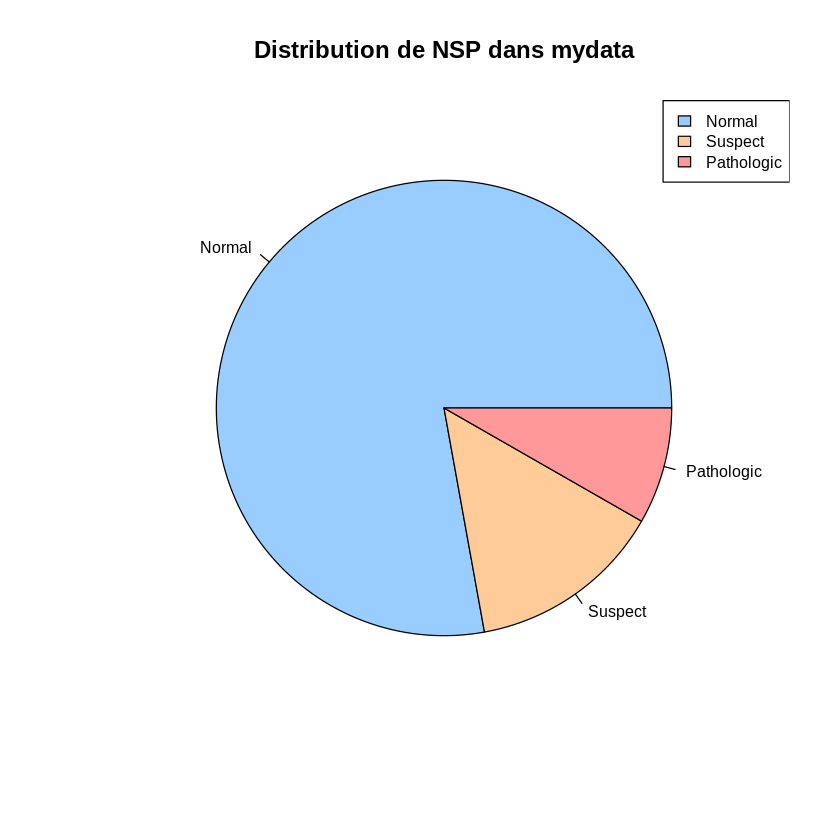

In [ ]:
# Charger les packages nécessaires
library(ggplot2)
library(dplyr)

# Charger le dataset "ctg" depuis le package "MLbench"
# data("ctg", package = "MLbench")

# Afficher la distribution de la variable cible "NSP"
a <- table(data$NSP)
label <- c("Normal", "Suspect", "Pathologic")
pie(a, labels = label, col = c("#99CCFF", "#FFCC99", "#FF9999"), main = "Distribution de NSP dans mydata", cex = 0.8)
legend("topright", label, fill = c("#99CCFF", "#FFCC99", "#FF9999"), cex = 0.8)


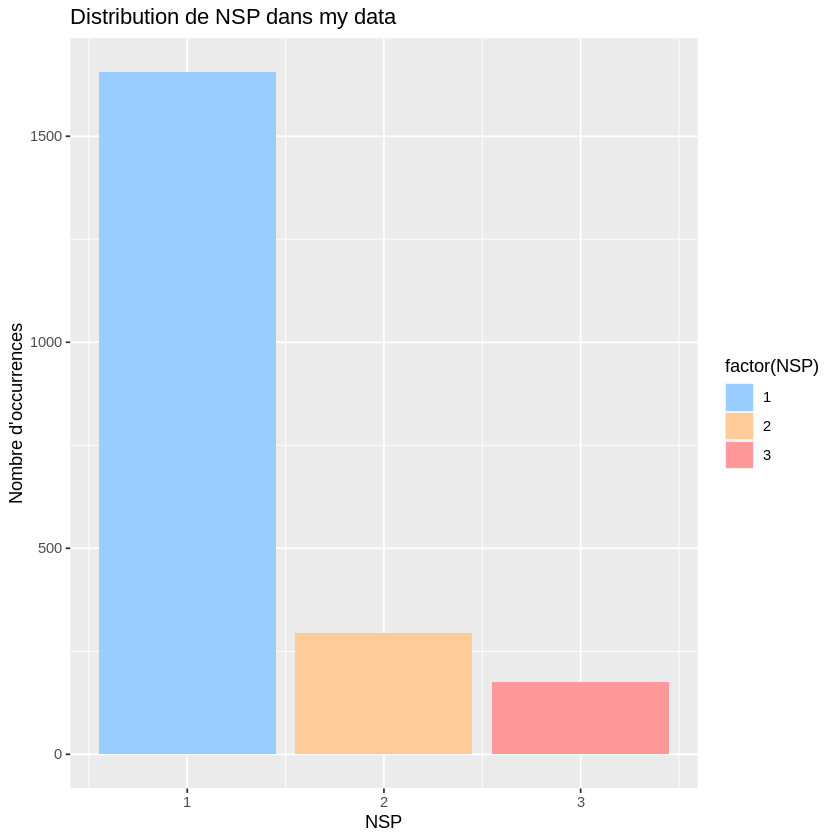

In [ ]:

# # Afficher un diagramme en barres pour la variable cible "NSP"
 data %>% ggplot(aes(x = NSP, fill = factor(NSP))) + geom_bar() + labs(title = "Distribution de NSP dans my data", x = "NSP", y = "Nombre d'occurrences") + scale_fill_manual(values = c("#99CCFF", "#FFCC99", "#FF9999"))


# **model  **

In [ ]:
# Set a seed for reproducibility
set.seed(123)

# Split the data set into a training set (70%) and a testing set (30%)
train_index <- sample(nrow(data), 0.7*nrow(data))
train <- data[train_index,]
test <- data[-train_index,]
head(train)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
526,158,0.011655012,0.025641026,0.000000000,0.000000000,0,0,42,0.9,0,⋯,151,194,2,0,180,175,178,10,0,1
195,150,0.000000000,0.000000000,0.006355932,0.000000000,0,0,56,0.5,19,⋯,148,167,2,0,153,157,158,3,0,2
1842,137,0.002018163,0.004036327,0.007063572,0.006054490,0,0,58,1.9,0,⋯,52,161,8,2,139,132,140,28,1,1
1142,122,0.000000000,0.000000000,0.004950495,0.004950495,0,0,26,1.3,0,⋯,85,132,3,2,126,119,123,10,1,1
1253,112,0.000000000,0.000000000,0.003976143,0.000000000,0,0,23,1.3,11,⋯,104,144,1,0,112,113,114,2,-1,1
1268,119,0.000000000,0.000000000,0.002577320,0.000000000,0,0,23,1.5,0,⋯,106,145,3,1,125,124,126,3,0,1


In [ ]:
# first mdoel
require(nnet)
# Fit a multinomial logistic regression model to the training set
# model <- multinom(NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + MSTV + ALTV + MLTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + Median + Variance + Tendency, data=train)
 model <- multinom(NSP ~ . , data=train)


Loading required package: nnet



# weights:  69 (44 variable)
initial  value 1634.735086 
iter  10 value 658.528104
iter  20 value 591.663252
iter  30 value 443.744085
iter  40 value 401.539956
iter  50 value 396.354994
iter  60 value 360.905401
iter  70 value 333.631218
iter  80 value 330.916851
iter  90 value 308.539024
iter 100 value 308.538709
final  value 308.538709 
stopped after 100 iterations


In [ ]:
summary(model)

Call:
multinom(formula = NSP ~ ., data = train)

Coefficients:
  (Intercept)         LB         AC       FM        UC         DL         DS
2   -18.62091 -0.1122981 -1111.3458 16.38077 -335.1517  -49.97592 -0.1622079
3   -22.64164  0.5444708  -101.1991 21.91418 -514.2315 -219.11449 10.7215404
         DP       ASTV       MSTV       ALTV       MLTV       Width       Min
2  88.01692 0.07525848 -0.5186594 0.02540151 0.00808540 0.006768958 0.0151910
3 118.29357 0.20465042 -0.6896152 0.06046114 0.08588878 0.010221789 0.0263206
         Max       Nmax     Nzeros       Mode        Mean     Median   Variance
2 0.02195996  0.1459537 -0.5112850 0.02488900  0.11760463  0.0282119 0.03988628
3 0.03654240 -0.1463872  0.6646822 0.02160642 -0.07920387 -0.5026790 0.06575981
    Tendency
2 0.03635671
3 0.96934285

Std. Errors:
  (Intercept)         LB          AC        FM          UC           DL
2   2.1342275 0.03613460 0.014631246 2.3084124 0.010032910 0.0024762012
3   0.5919857 0.04859053 0.00192929

In [ ]:
# test anova and wald test
install.packages("car")
library(car)
# Perform the ANOVA analysis
Anova(model, type = 3, test.statistic = "Wald", singular.ok = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
LB,102.20096966,2,6.417139e-23
AC,118.59296364,2,1.769559e-26
FM,32.74453577,2,7.755582e-08
UC,63.98180894,2,1.277988e-14
DL,7.90708444,2,1.918662e-02
DS,0.85601375,2,6.518069e-01
DP,4.10344734,2,1.285132e-01
ASTV,96.16270099,2,1.313817e-21
MSTV,2.86234188,2,2.390289e-01


In [ ]:
model_backward <- step(model, direction = "backward") # Utiliser la méthode backward elimination pour sélectionner les variables les plus pertinentes
model_backward

Start:  AIC=701.08
NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + MSTV + ALTV + 
    MLTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + 
    Median + Variance + Tendency

trying - LB 
# weights:  66 (42 variable)
initial  value 1634.735086 
iter  10 value 637.089996
iter  20 value 589.518771
iter  30 value 474.248407
iter  40 value 460.080299
iter  50 value 413.998057
iter  60 value 383.018789
iter  70 value 377.289335
iter  80 value 360.150475
iter  90 value 359.732025
iter 100 value 359.639194
final  value 359.639194 
stopped after 100 iterations
trying - AC 
# weights:  66 (42 variable)
initial  value 1634.735086 
iter  10 value 658.528130
iter  20 value 591.665358
iter  30 value 443.805903
iter  40 value 402.677406
iter  50 value 400.143689
iter  60 value 386.358464
iter  70 value 379.306761
iter  80 value 376.763627
iter  90 value 367.836422
iter 100 value 367.835191
final  value 367.835191 
stopped after 100 iterations
trying - FM 
# weights:  66 (42 variable)
initial  val

Call:
multinom(formula = NSP ~ LB + AC + FM + UC + DL + ASTV + ALTV + 
    Width + Min + Max + Nmax + Nzeros + Mean + Median + Variance + 
    Tendency, data = train)

Coefficients:
  (Intercept)         LB          AC       FM        UC        DL      ASTV
2   -19.18210 -0.1034184 -1007.79696 15.19347 -333.0147 -115.3587 0.0797108
3   -23.65886  0.4991214   -96.78376 22.29881 -448.1692 -221.1666 0.2104539
        ALTV       Width        Min        Max       Nmax     Nzeros       Mean
2 0.02641530 0.004308028 0.01294657 0.01725460  0.1473308 -0.4836328  0.1348255
3 0.05924435 0.010249399 0.01957501 0.02982441 -0.1612720  0.6801502 -0.0188590
       Median   Variance   Tendency
2  0.03489529 0.04180695 0.07562919
3 -0.47697309 0.05948985 0.97118203

Residual Deviance: 624.744 
AIC: 688.744 

In [ ]:
Anova(model_backward,type=3,test.statistic = "Wald",singular.ok=TRUE)

In [ ]:
# Create a confusion matrix
confusion_matrix <- table(test$NSP, predicted_classes)

# Calculate precision, recall, and F1-score for each class
precision <- diag(confusion_matrix)/colSums(confusion_matrix)
recall <- diag(confusion_matrix)/rowSums(confusion_matrix)
f1_score <- 2*precision*recall/(precision + recall)

# Calculate overall accuracy
overall_accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)

# Print the results
cat("Confusion Matrix:\n")
print(confusion_matrix)
cat("\n")
cat(sprintf("Precision: %s\n", paste(round(precision, 3), collapse = ", ")))
cat(sprintf("Recall: %s\n", paste(round(recall, 3), collapse = ", ")))
cat(sprintf("F1-Score: %s\n", paste(round(f1_score, 3), collapse = ", ")))
cat(sprintf("Overall Accuracy: %s\n", round(overall_accuracy, 3)))



In [ ]:
# Make predictions on the testing set
predicted_classes <- predict(model_backward, newdata=test)
#Confusion Matrix & Misclassification Error - Training Data
p <- predict(model,test)
head(p)
head(test$NSP)

tab <- table(p,test$NSP)
tab
acc=sum(diag(tab))/sum(tab)
acc
1-acc

In [ ]:
prev_prob <- data.frame(complet=predict(model,newdata=test,
                                        type="class"),step=predict(model_backward,newdata=test,type="class"))
prev_class<- ifelse(prev_prob ==1, "N",
                              ifelse(prev_prob ==2, "S", "P"))
prev_class

In [ ]:
###############################################confusion matrix
install.packages("caret")
library(caret)


In [ ]:
# Make predictions on the test set
predictions <- predict(model, newdata = test, type = "class")
# Create confusion matrix
 cm <- confusionMatrix(predictions, NSP)

# Print the confusion matrix
#print(cm)


# **VISULATISATION **

In [ ]:

# Set up the 2x2 grid
# par(mfrow=c(2,2))

# # Create histograms for four different variables
# hist(data$LB, main="Histogram of LB")
# hist(data$ASTV, main="Histogram of ASTV")
# hist(data$ALTV, main="Histogram of ALTV")
# hist(data$Width, main="Histogram of Width")


# Définir la taille de la figure
par(mfrow = c(2, 2))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  hist(data[,i], main = colnames(data)[i])
}

In [ ]:
# Diviser la fenêtre graphique en 1 rangée et 2 colonnes pour afficher 2 boxplots
par(mfrow=c(1,2))

# Afficher le premier boxplot
boxplot(data$NSP, main="Boxplot of LB", col="blue", border="black")

# Afficher le deuxième boxplot
# boxplot(log(data), main="Boxplot of log(LB)", col="red", border="black")

In [ ]:

# Définir la taille de la figure
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}


In [ ]:
pie(table(data$NSP), col = c("skyblue", "pink", "lightgreen"), main = "Distribution de NSP")


In [ ]:
# Définir la taille de la figure
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  pie(table(data[,i]), col = c("skyblue", "pink", "lightgreen"), main = "Distribution de NSP")

  # boxplot(data[,i], main = colnames(data)[i])
}

In [ ]:
# Définir le chemin et le nom de fichier pour l'image PNG
 png("boxplots.png")

# Afficher les boxplots en utilisant une disposition en 2x3
par(mfrow = c(2, 3))
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}

# Fermer le fichier PNG
 dev.off()


In [ ]:
# Créer un fichier PNG avec une largeur de 800 pixels et une hauteur de 600 pixels
png("boxplots2.png", width=1800, height=1600)

# Diviser l'espace de traçage en 2 lignes et 3 colonnes pour afficher les boxplots
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}

# Fermer le fichier PNG
dev.off()


In [ ]:
# Ouvrir un fichier PDF pour sauvegarder les boxplots
pdf("boxplots_ctg.pdf")

# Définir la disposition en rangées et colonnes
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}

# Fermer le fichier PDF
dev.off()
